## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drinks = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [121]:
drinks = drinks.drop(columns=['total_litres_of_pure_alcohol'])
tidy_drinks = drinks.melt(
    id_vars = ['country'],
    var_name = 'drink',
    value_name = 'servings'
)
tidy_drinks

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

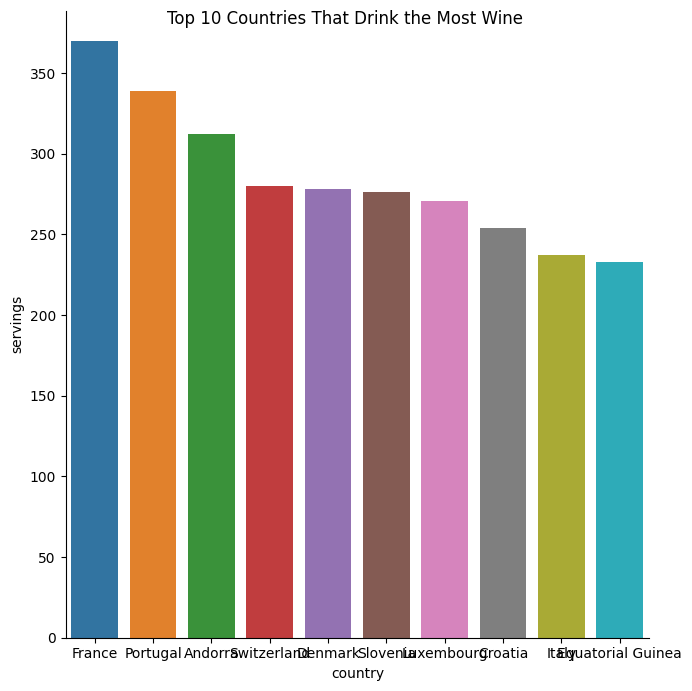

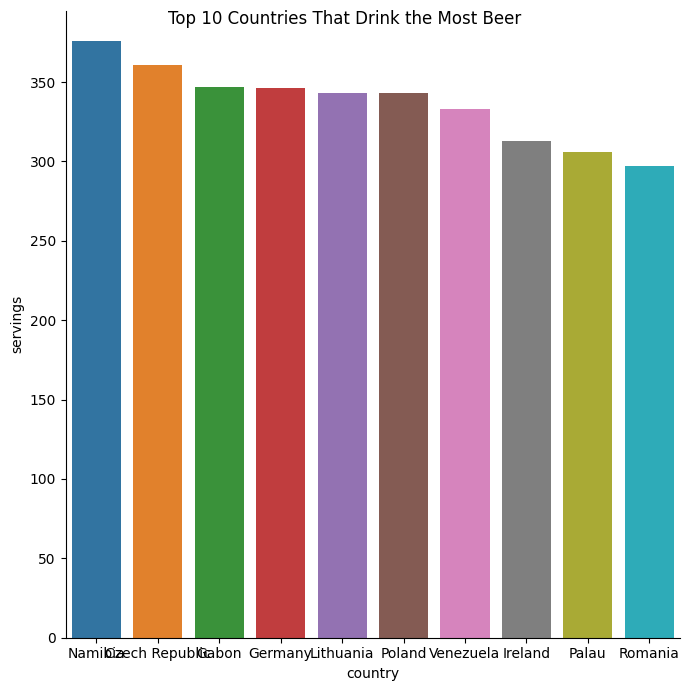

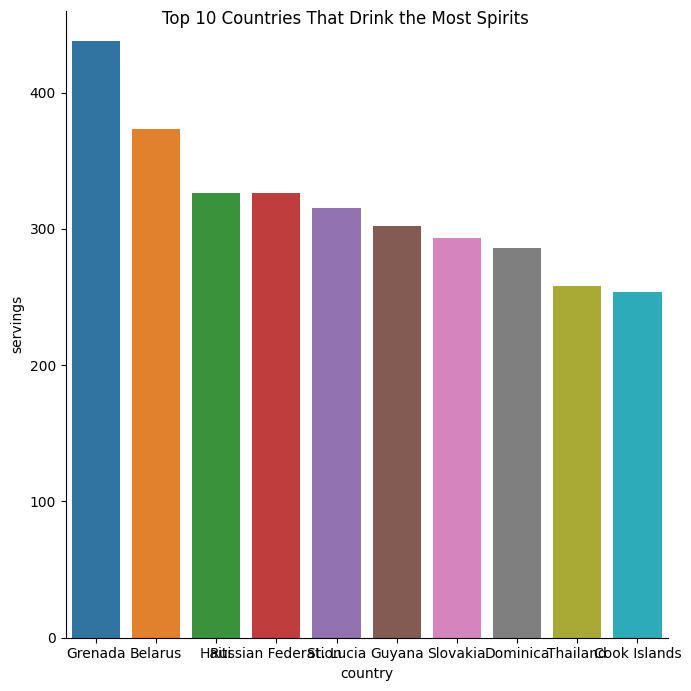

In [124]:
tidy_drinks['drink'] = tidy_drinks['drink'].str.replace("_servings", "")
tidy_drinks_wine = tidy_drinks[tidy_drinks['drink'] == 'wine']
tidy_drinks_wine = tidy_drinks_wine.sort_values('servings', ascending = False).head(10)

top10_wine = sns.catplot(
    data = tidy_drinks_wine,
    x = 'country',
    y = 'servings',
    hue = 'country',
    kind = 'bar',
    height = 7
)
top10_wine.fig.suptitle("Top 10 Countries That Drink the Most Wine");

tidy_drinks_beer = tidy_drinks[tidy_drinks['drink'] == 'beer']
tidy_drinks_beer = tidy_drinks_beer.sort_values('servings', ascending = False).head(10)
top10_beer = sns.catplot(
    data = tidy_drinks_beer,
    x = 'country',
    y = 'servings',
    hue = 'country',
    kind = 'bar',
    height = 7
)
top10_beer.fig.suptitle("Top 10 Countries That Drink the Most Beer");

tidy_drinks_spirits = tidy_drinks[tidy_drinks['drink'] == 'spirit']
tidy_drinks_spirits = tidy_drinks_spirits.sort_values('servings', ascending = False).head(10)
top10_spirits = sns.catplot(
    data = tidy_drinks_spirits,
    x = 'country',
    y = 'servings',
    hue = 'country',
    kind = 'bar',
    height = 7
)
top10_spirits.fig.suptitle("Top 10 Countries That Drink the Most Spirits");

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [123]:
wide_drinks = pd.pivot_table(
    tidy_drinks,
    values = 'servings',
    index = 'country',
    columns = 'drink',
    aggfunc = 'min'
)

wide_drinks

drink,beer,spirit,wine
country,,,
Afghanistan,0,0,0
Albania,89,132,54
Algeria,25,0,14
Andorra,245,138,312
Angola,217,57,45
...,...,...,...
Venezuela,333,100,3
Vietnam,111,2,1
Yemen,6,0,0
